In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(rc={
    'figure.figsize':(20, 15)
})

In [2]:
df=pd.read_csv("historical_stock_prices.csv", nrows=365)
df.shape

(365, 8)

In [3]:
df.head()

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14


In [4]:
df.tail()

,ticker,open,close,adj_close,low,high,volume,date
360,PEZ,28.150000,28.120001,26.203146,28.000000,28.150000,12800,2007-02-06
361,PEZ,28.290001,28.250000,26.324280,28.250000,28.290001,1700,2007-02-07
362,PEZ,28.290001,28.370001,26.436100,28.290001,28.400000,8400,2007-02-08
363,PEZ,28.240000,27.969999,26.063368,27.969999,28.240000,300,2007-02-09
364,PEZ,27.889999,27.920000,26.016779,27.889999,27.920000,700,2007-02-12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     365 non-null    object 
 1   open       365 non-null    float64
 2   close      365 non-null    float64
 3   adj_close  365 non-null    float64
 4   low        365 non-null    float64
 5   high       365 non-null    float64
 6   volume     365 non-null    int64  
 7   date       365 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 22.9+ KB


In [6]:
df.sort_values('date', inplace=True)
df.head()

,ticker,open,close,adj_close,low,high,volume,date
200,PEZ,25.250000,25.420000,23.544323,25.200001,25.440001,10800,2006-10-12
289,PEZ,25.549999,25.510000,23.627684,25.510000,25.549999,600,2006-10-13
291,PEZ,25.610001,25.590000,23.701780,25.590000,25.610001,1900,2006-10-16
292,PEZ,25.549999,25.450001,23.572115,25.320000,25.549999,1300,2006-10-17
293,PEZ,25.750000,25.590000,23.701780,25.580000,25.750000,800,2006-10-18


In [7]:
df.set_index(pd.to_datetime(df['date']), inplace=True)
df=df[['close']]
df.head()

,close
date,
2006-10-12,25.420000
2006-10-13,25.510000
2006-10-16,25.590000
2006-10-17,25.450001
2006-10-18,25.590000


In [8]:
df.describe()

,close
count,365.000000
mean,14.578685
std,6.761988
min,8.850000
25%,9.780000
50%,10.800000
75%,18.180000
max,28.370001


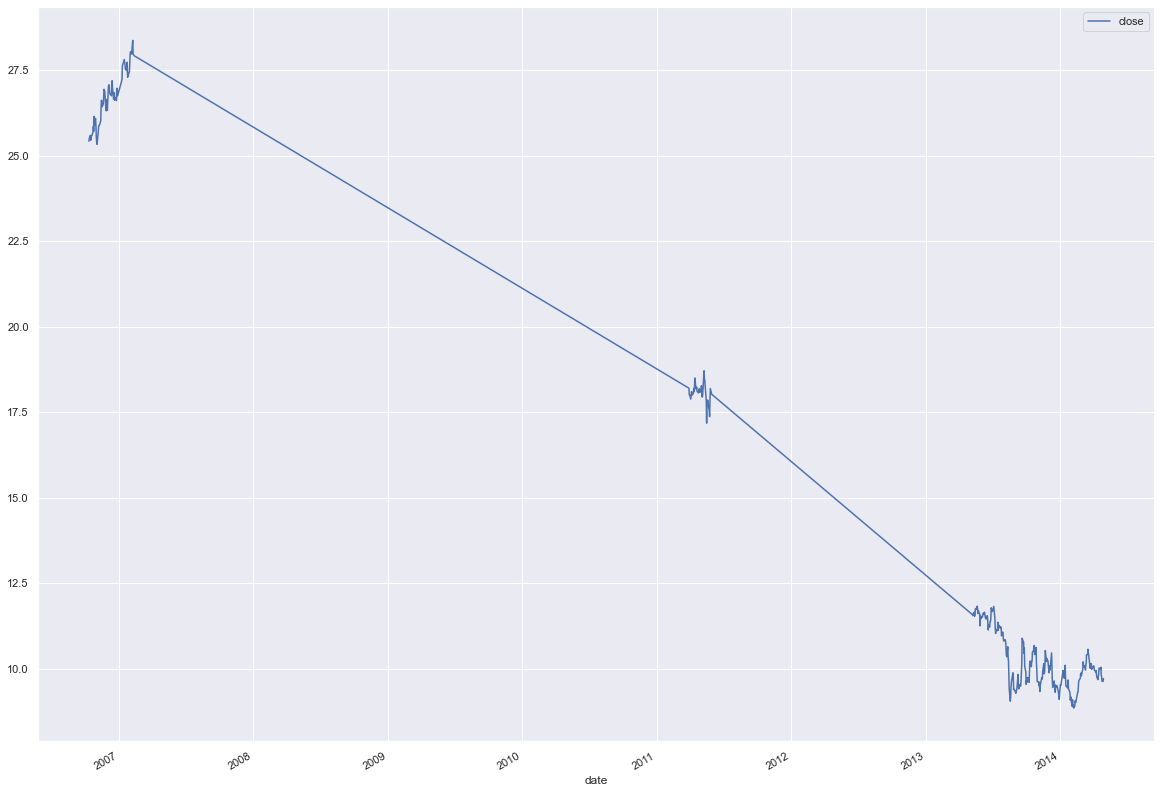

In [9]:
df.plot();
plt.show()

In [10]:
roll_mean=df.rolling(28).mean()
roll_std=df.rolling(28).std()

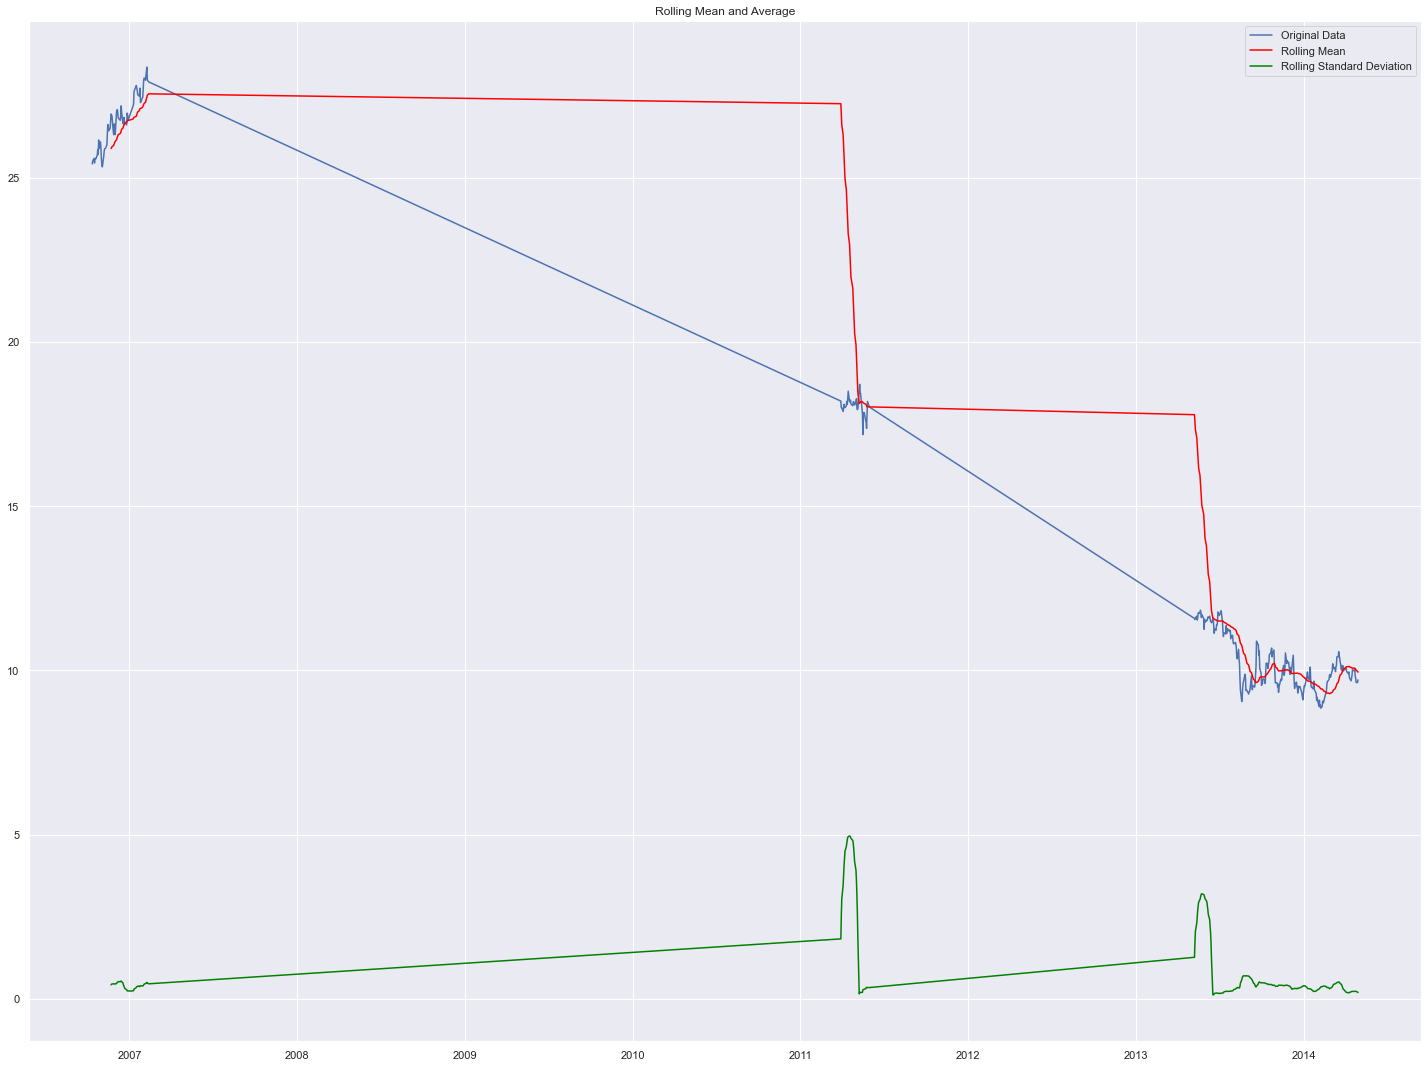

In [11]:
plt.plot(df, label='Original Data')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='green', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean and Average')
plt.tight_layout()
plt.show()

In [12]:
import statsmodels

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
def stationarity(data):
    result=adfuller(data)
    keys=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for key, value in zip(keys, result):
        print(key+' : '+str(value))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
stationarity(df['close'])

ADF Test Statistic : -1.4739035271087315
p-value : 0.5463791392947306
#Lags Used : 0
Number of Observations Used : 364
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

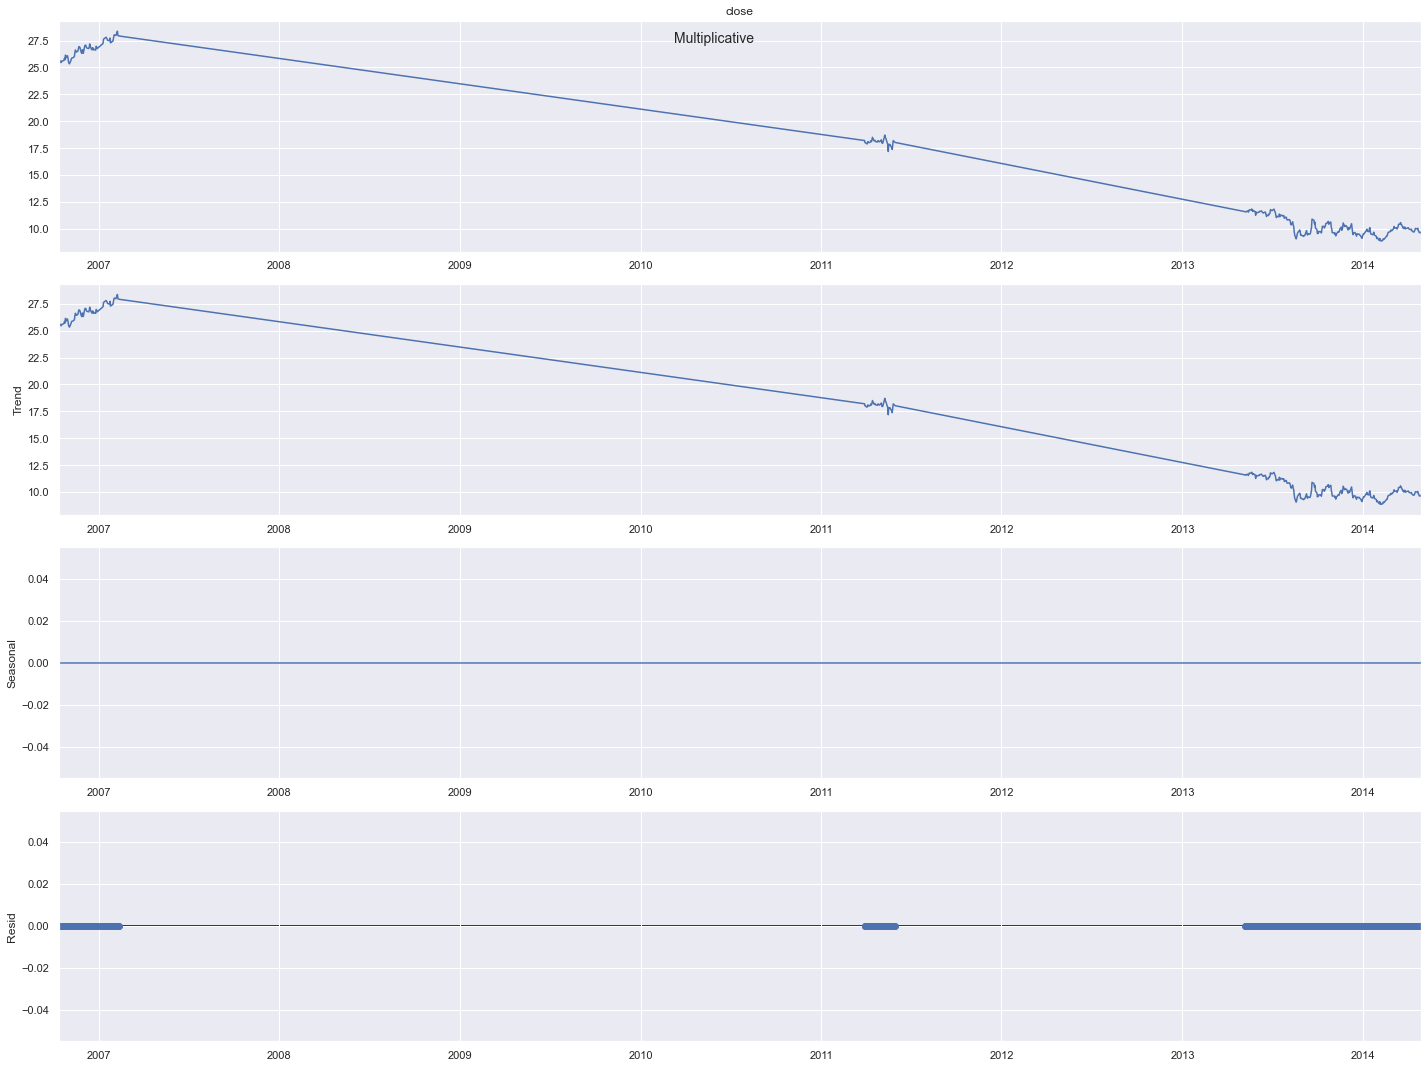

In [17]:
mul=seasonal_decompose(df['close'], model='Mutiplicative', period=1)
mul.plot().suptitle('\nMultiplicative', fontsize=14);
plt.show()

In [18]:
df_shift=np.log(df)-np.log(df.shift(1))
df_shift.dropna(inplace=True)

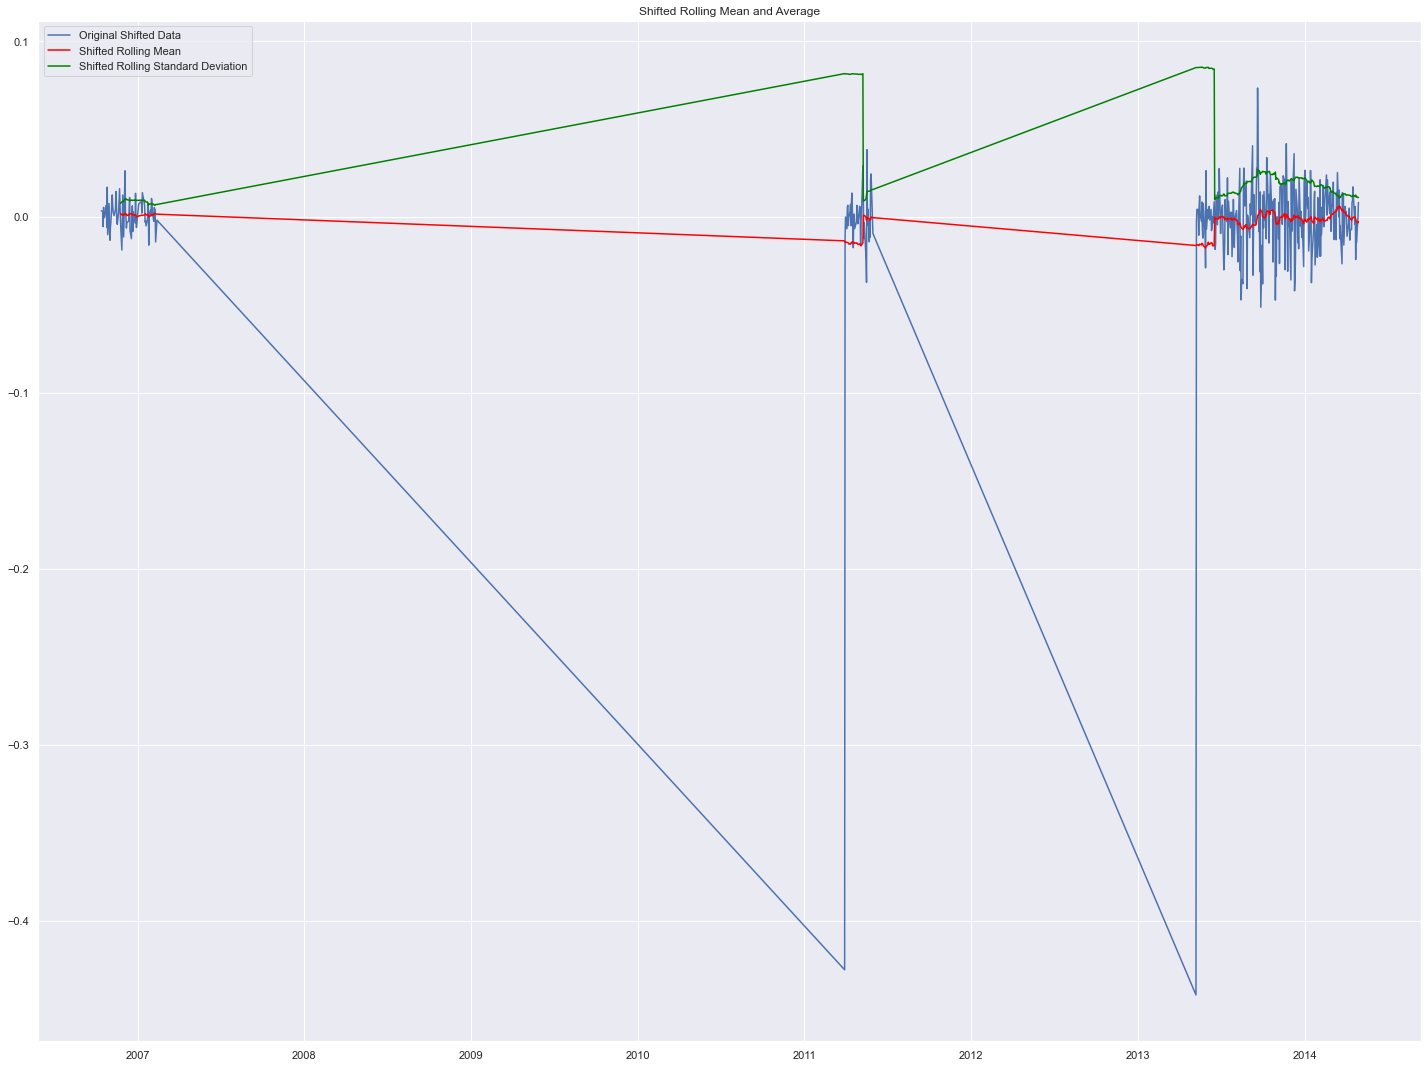

In [19]:
plt.plot(df_shift, label='Original Shifted Data')
plt.plot(df_shift.rolling(28).mean(), color='red', label='Shifted Rolling Mean')
plt.plot(df_shift.rolling(28).std(), color='green', label='Shifted Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Shifted Rolling Mean and Average')
plt.tight_layout()
plt.show()

In [20]:
stationarity(df_shift)

ADF Test Statistic : -18.576168935138345
p-value : 2.0801572293898643e-30
#Lags Used : 0
Number of Observations Used : 363
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


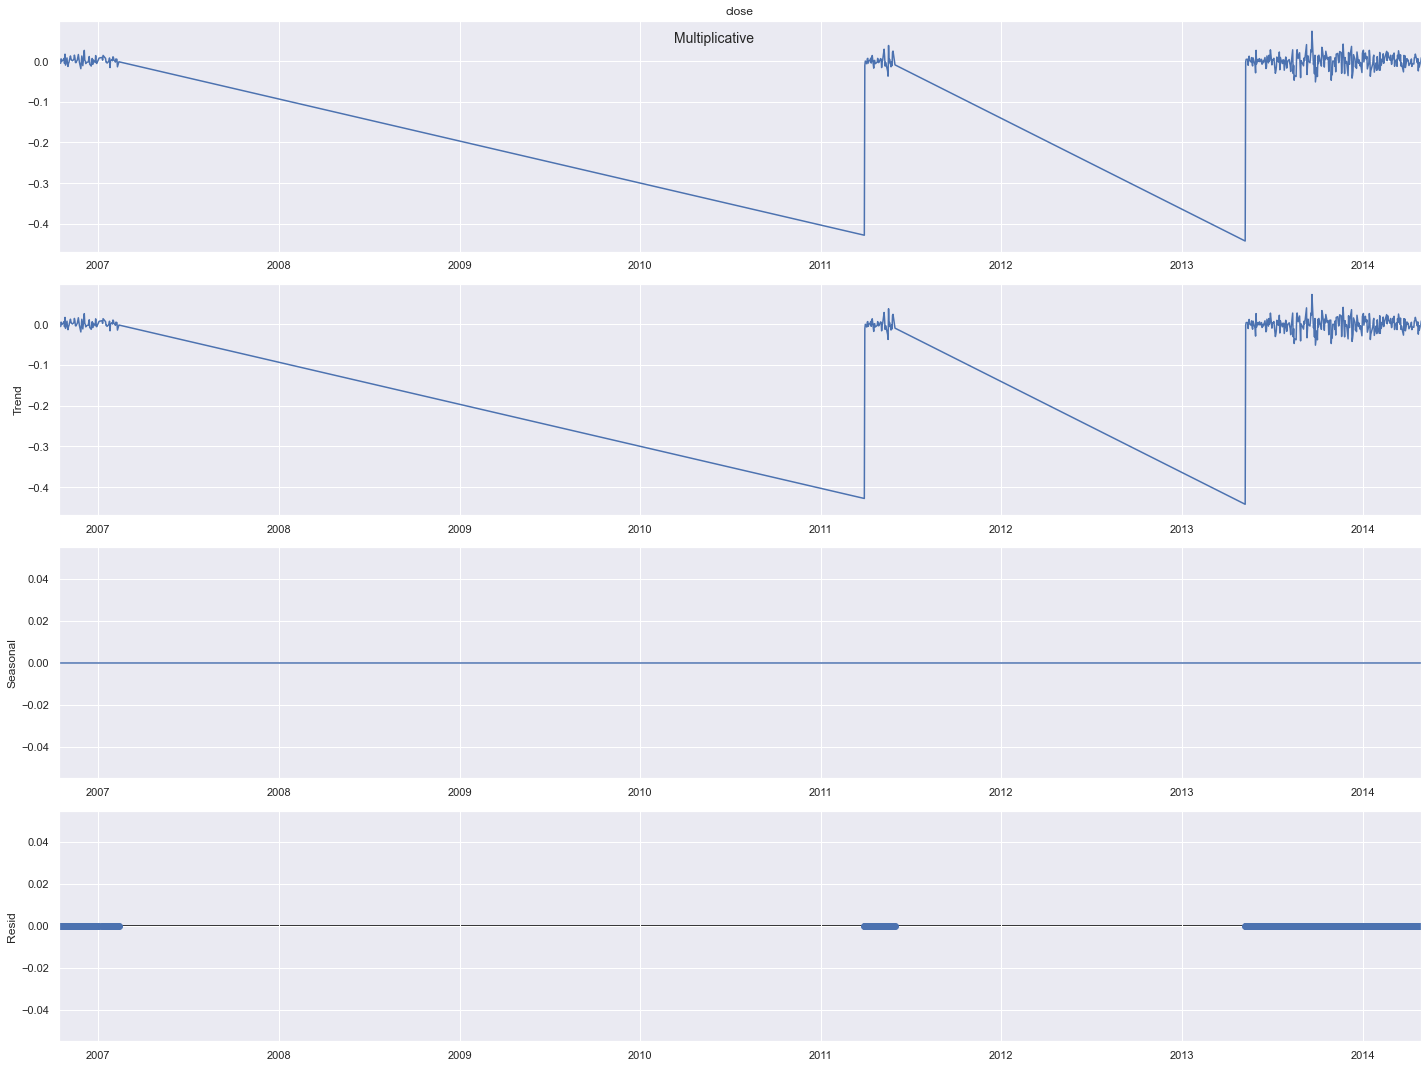

In [21]:
mul=seasonal_decompose(df_shift['close'], model='Mutiplicative', period=1)
mul.plot().suptitle('\nMultiplicative', fontsize=14);
plt.show()

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

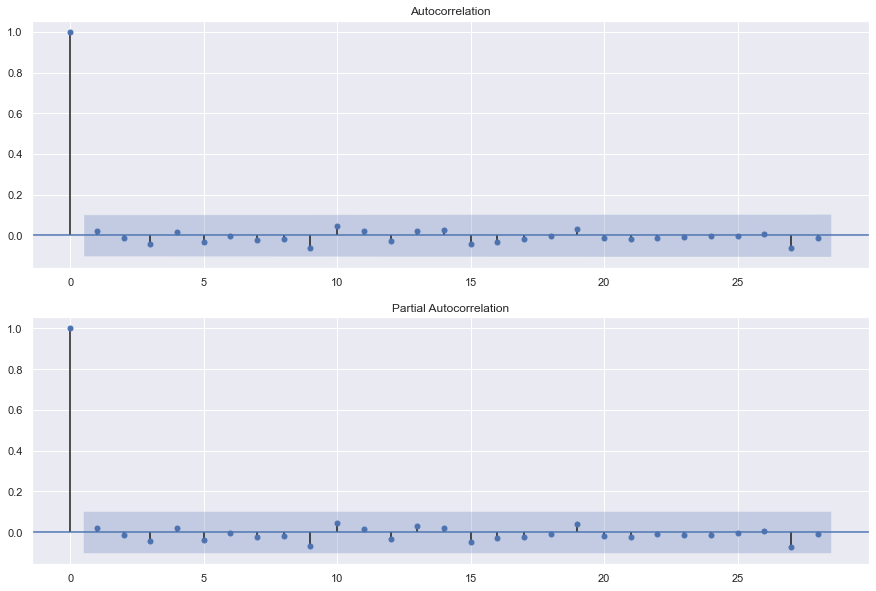

In [23]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(211)
fig=plot_acf(df_shift['close'],lags=28,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df_shift['close'],lags=28,ax=ax2)
plt.show()

In [24]:
from statsmodels.tsa.arima_model import ARIMA

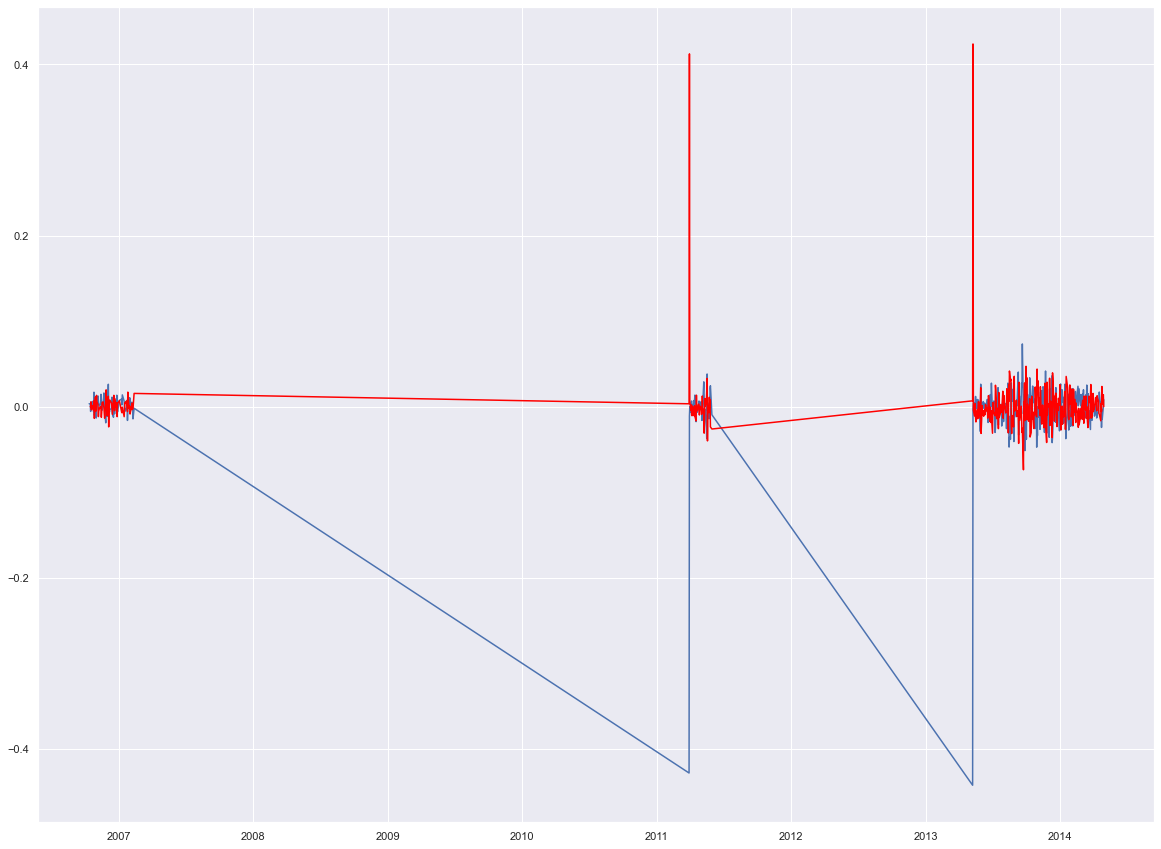

In [25]:
model=ARIMA(df_shift, order=(1, 1, 1))
result=model.fit(disp=False)
plt.plot(df_shift)
plt.plot(result.fittedvalues, color='red')
plt.show()

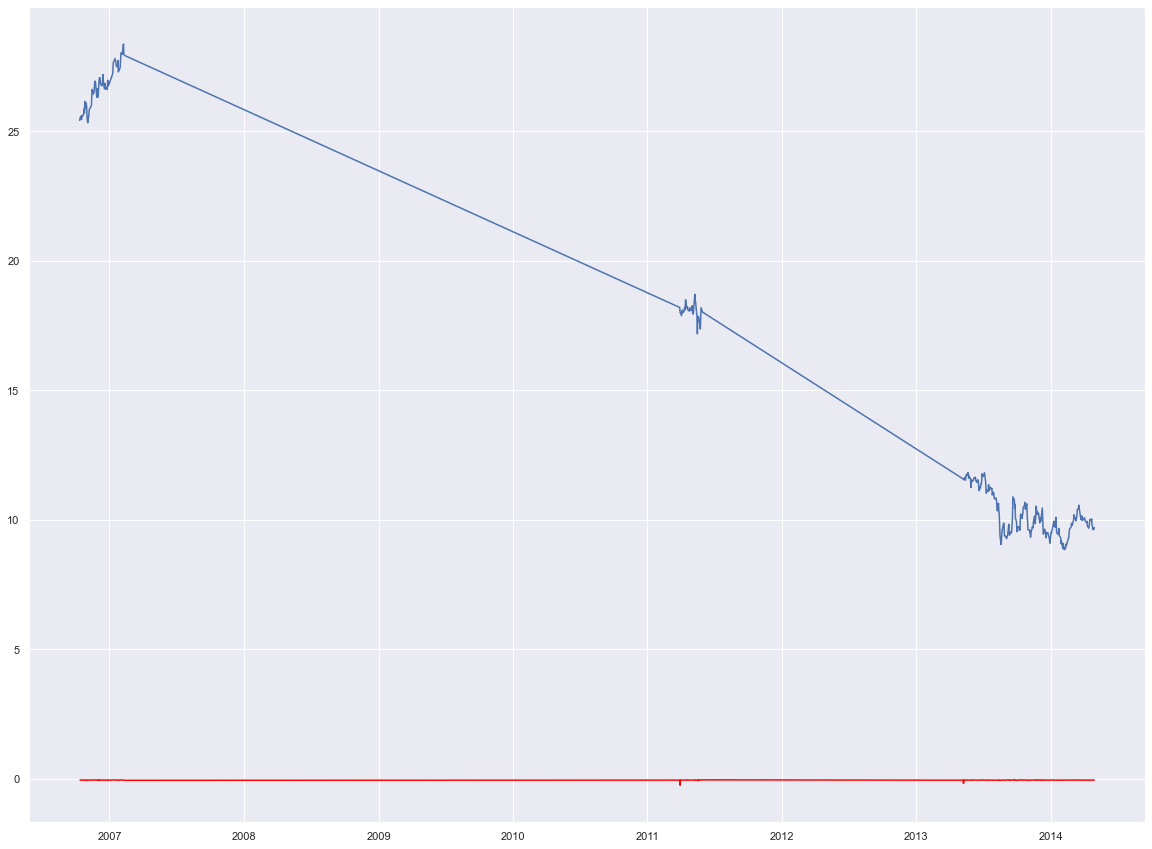

In [26]:
model2=ARIMA(df, order=(1, 1, 1))
result2=model2.fit(disp=False)
plt.plot(df)
plt.plot(result2.fittedvalues, color='red')
plt.show()

In [27]:
prediction=pd.Series(result.fittedvalues, copy=True)
prediction.head()

date
2006-10-16    0.000013
2006-10-17    0.000216
2006-10-18    0.005727
2006-10-19   -0.003650
2006-10-20    0.001645
dtype: float64

In [28]:
prediction_cumsum=prediction.cumsum()
prediction_cumsum.head()

date
2006-10-16    0.000013
2006-10-17    0.000229
2006-10-18    0.005956
2006-10-19    0.002306
2006-10-20    0.003951
dtype: float64

In [29]:
shift_pred=pd.Series(df_shift.iloc[0], index=df_shift.index)
shift_pred=shift_pred.add(prediction_cumsum, fill_value=0)
shift_pred.head()

date
2006-10-13         NaN
2006-10-16    0.000013
2006-10-17    0.000229
2006-10-18    0.005956
2006-10-19    0.002306
dtype: float64

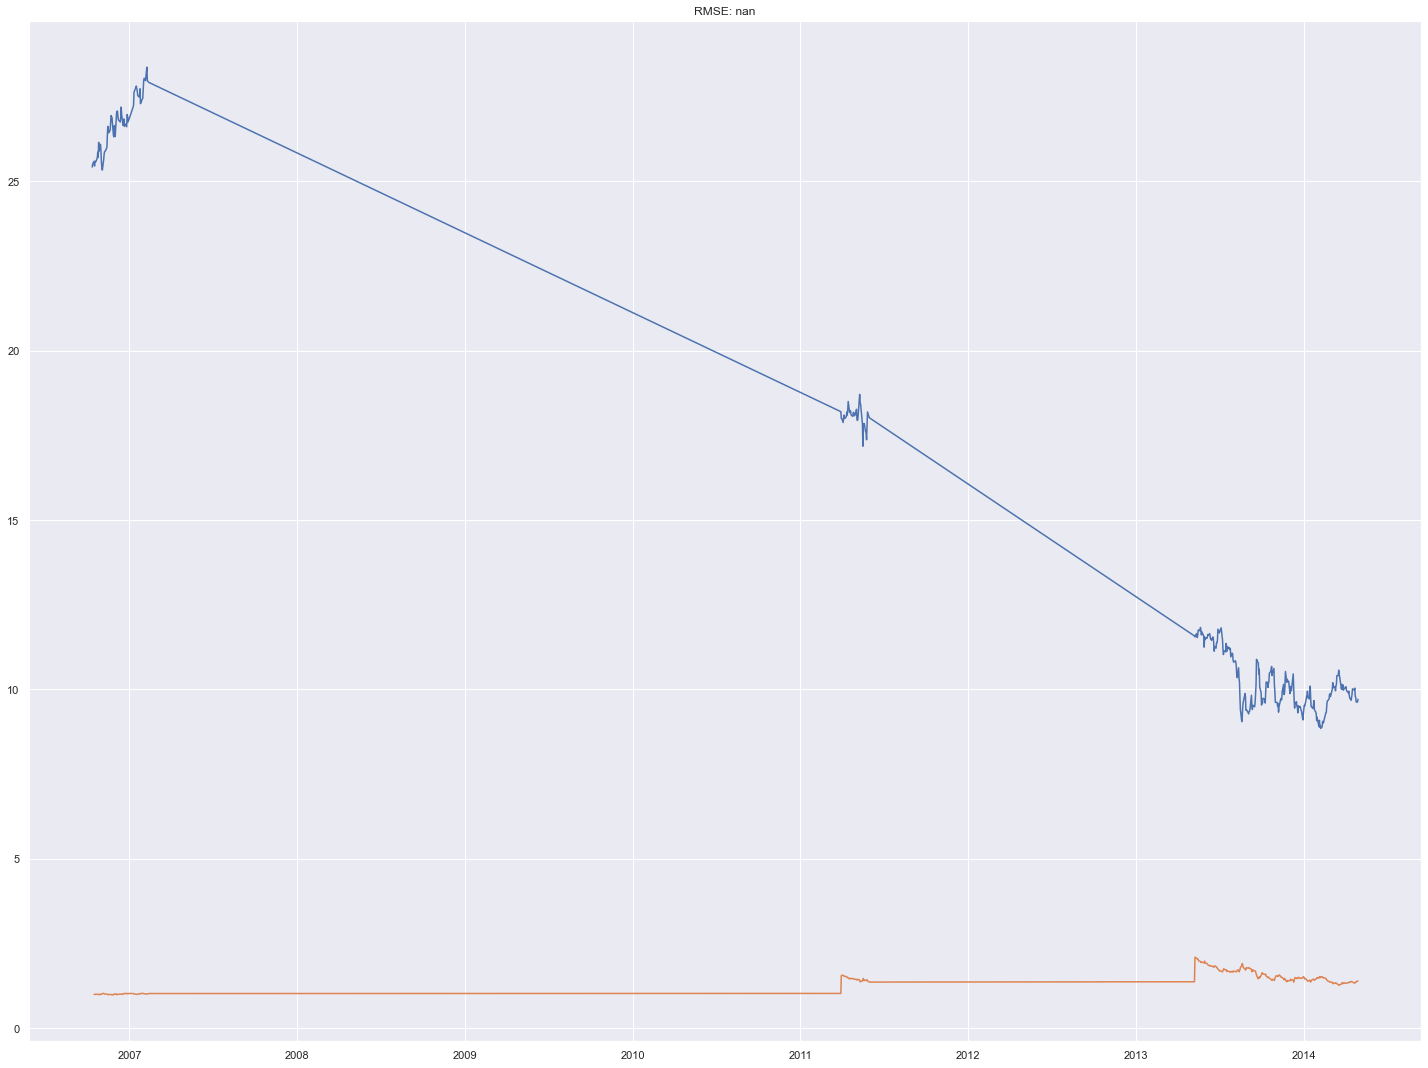

In [31]:
actual_pred=np.exp(shift_pred)
plt.plot(df['close'])
plt.plot(actual_pred)
plt.title('RMSE: %.4f'% np.sqrt(sum((actual_pred-df['close'])**2)/len(df)))
plt.tight_layout()
plt.show()

In [32]:
df

,close
date,
2006-10-12,25.420000
2006-10-13,25.510000
2006-10-16,25.590000
2006-10-17,25.450001
2006-10-18,25.590000
...,...
2014-04-23,9.800000
2014-04-24,9.770000
2014-04-25,9.630000


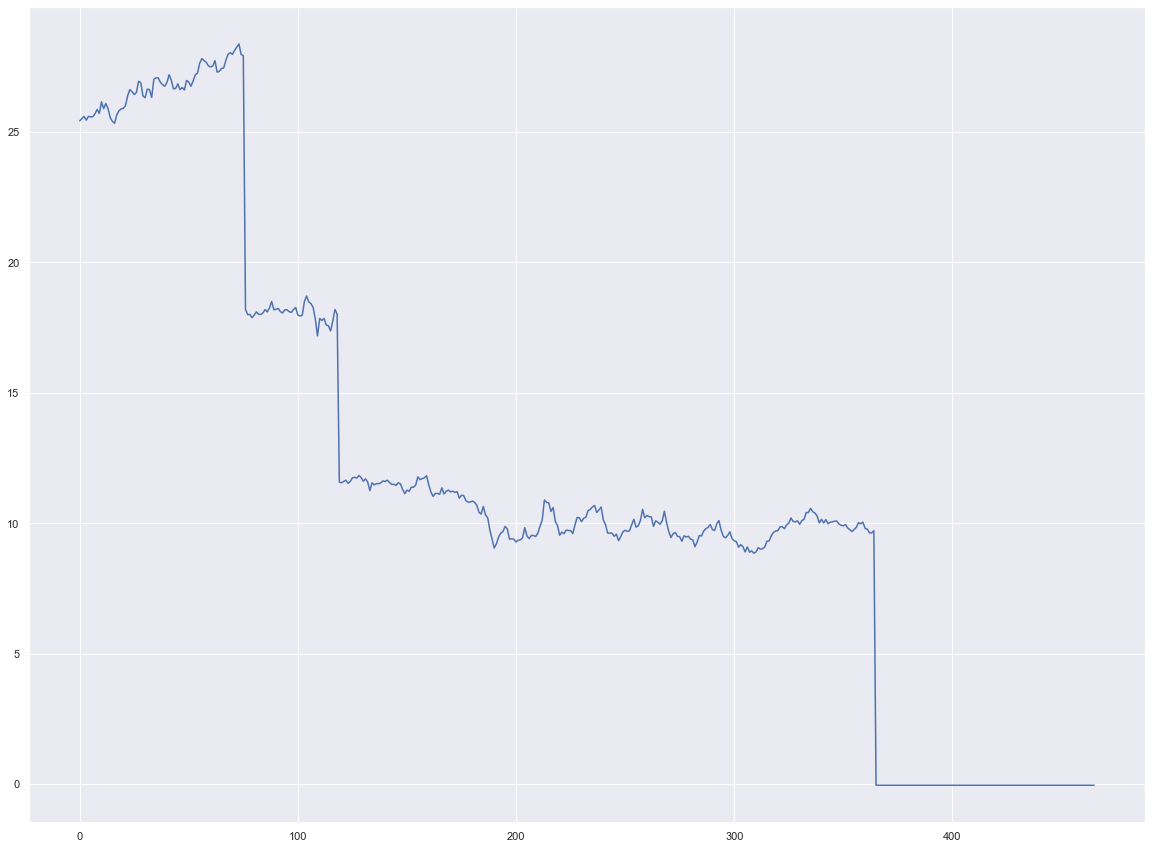

In [33]:
model=ARIMA(df['close'], order=(1, 1, 1))
result=model.fit(disp=False)
prediction=result.predict(len(df), len(df)+100)
combine=df['close'].tolist()+prediction.tolist()
plt.plot(combine)
plt.show()

In [34]:
np.sqrt(sum((prediction-df['close'])**2)/len(df))

nan